In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2f3fd0803e5b9da565d3ac92e51a834d


In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mbandaka
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | trapani
Processing Record 4 of Set 1 | seymchan
Processing Record 5 of Set 1 | azacualpa
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | auki
Processing Record 9 of Set 1 | vangaindrano
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | bathsheba
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | senanga
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 of Set 1 | yellowknife
Processing Record 24 of Set 1 | busselton
P

Processing Record 39 of Set 4 | belmopan
Processing Record 40 of Set 4 | bury saint edmunds
City not found. Skipping...
Processing Record 41 of Set 4 | tazovskiy
Processing Record 42 of Set 4 | santa cruz del sur
Processing Record 43 of Set 4 | brae
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | camacha
Processing Record 46 of Set 4 | hermanus
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | tecpan
Processing Record 50 of Set 4 | mandalgovi
Processing Record 1 of Set 5 | alexandria
Processing Record 2 of Set 5 | tuktoyaktuk
Processing Record 3 of Set 5 | micheweni
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | itamaraju
Processing Record 6 of Set 5 | zajas
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | buala
Processing Record 9 of Set 5 | pong
Processing Record 10 of Set 5 | ruwi
Processing Record 11 of Set 5 | vardo
P

Processing Record 27 of Set 8 | wajir
Processing Record 28 of Set 8 | codrington
Processing Record 29 of Set 8 | san quintin
Processing Record 30 of Set 8 | madimba
Processing Record 31 of Set 8 | volokonovka
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | veliki preslav
Processing Record 34 of Set 8 | rocha
Processing Record 35 of Set 8 | maragogi
Processing Record 36 of Set 8 | reconquista
Processing Record 37 of Set 8 | mana
Processing Record 38 of Set 8 | inuvik
Processing Record 39 of Set 8 | berdigestyakh
Processing Record 40 of Set 8 | kazerun
Processing Record 41 of Set 8 | tilichiki
Processing Record 42 of Set 8 | nuuk
Processing Record 43 of Set 8 | qafsah
City not found. Skipping...
Processing Record 44 of Set 8 | coolum beach
Processing Record 45 of Set 8 | karaton
Processing Record 46 of Set 8 | dwarka
Processing Record 47 of Set 8 | lazaro cardenas
Processing Record 48 of Set 8 | fort smith
Processing Record 49 of Set 8 | krasnogorskoye
Processin

Processing Record 15 of Set 12 | laguna
Processing Record 16 of Set 12 | dali
Processing Record 17 of Set 12 | rexburg
Processing Record 18 of Set 12 | skala
Processing Record 19 of Set 12 | karibib
Processing Record 20 of Set 12 | tambopata
City not found. Skipping...
Processing Record 21 of Set 12 | ajuchitlan
Processing Record 22 of Set 12 | marfino
Processing Record 23 of Set 12 | seoul
Processing Record 24 of Set 12 | talnakh
Processing Record 25 of Set 12 | port moresby
Processing Record 26 of Set 12 | birin
Processing Record 27 of Set 12 | ust-tsilma
Processing Record 28 of Set 12 | thinadhoo
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | matara
Processing Record 31 of Set 12 | ploemeur
Processing Record 32 of Set 12 | godalming
Processing Record 33 of Set 12 | seminole
Processing Record 34 of Set 12 | san carlos
Processing Record 35 of Set 12 | naze
Processing Record 36 of Set 12 | el roble
Processing Record 37 of Set 12 | varberg
Processing Record 38 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mbandaka,0.05,18.26,71.02,88,34,2.28,CD,2019-11-03 22:53:10
1,Rikitea,-23.12,-134.97,74.26,78,82,9.91,PF,2019-11-03 22:53:11
2,Trapani,38.02,12.54,69.80,73,40,24.16,IT,2019-11-03 22:53:11
3,Seymchan,62.93,152.39,12.83,94,100,2.71,RU,2019-11-03 22:53:11
4,Azacualpa,15.34,-88.55,84.20,74,75,9.17,HN,2019-11-03 22:53:11
5,Jamestown,-33.21,138.60,56.71,62,34,16.67,AU,2019-11-03 22:53:11
6,East London,-33.02,27.91,64.54,70,80,10.96,ZA,2019-11-03 22:53:12
7,Auki,12.18,6.51,77.99,33,93,2.59,NG,2019-11-03 22:53:12
8,Vangaindrano,-23.35,47.60,67.69,95,59,4.70,MG,2019-11-03 22:53:12
9,Ushuaia,-54.81,-68.31,44.60,52,75,19.46,AR,2019-11-03 22:53:12


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mbandaka,CD,2019-11-03 22:53:10,0.05,18.26,71.02,88,34,2.28
1,Rikitea,PF,2019-11-03 22:53:11,-23.12,-134.97,74.26,78,82,9.91
2,Trapani,IT,2019-11-03 22:53:11,38.02,12.54,69.80,73,40,24.16
3,Seymchan,RU,2019-11-03 22:53:11,62.93,152.39,12.83,94,100,2.71
4,Azacualpa,HN,2019-11-03 22:53:11,15.34,-88.55,84.20,74,75,9.17
5,Jamestown,AU,2019-11-03 22:53:11,-33.21,138.60,56.71,62,34,16.67
6,East London,ZA,2019-11-03 22:53:12,-33.02,27.91,64.54,70,80,10.96
7,Auki,NG,2019-11-03 22:53:12,12.18,6.51,77.99,33,93,2.59
8,Vangaindrano,MG,2019-11-03 22:53:12,-23.35,47.60,67.69,95,59,4.70
9,Ushuaia,AR,2019-11-03 22:53:12,-54.81,-68.31,44.60,52,75,19.46


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/03/19'

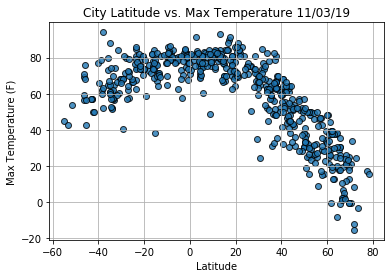

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

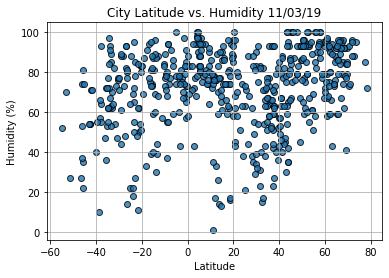

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

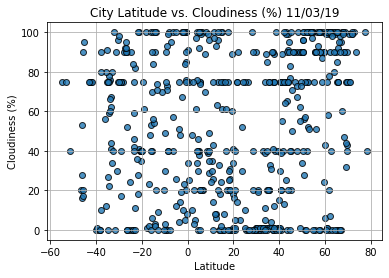

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

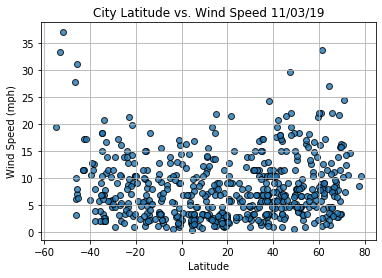

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                 Ponta Do Sol
Country                        BR
Date          2019-11-03 22:53:13
Lat                        -20.63
Lng                           -46
Max Temp                    70.18
Humidity                       80
Cloudiness                     35
Wind Speed                   1.01
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >=0

0       True
1      False
2       True
3       True
4       True
       ...  
547     True
548     True
549    False
550     True
551    False
Name: Lat, Length: 552, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mbandaka,CD,2019-11-03 22:53:10,0.05,18.26,71.02,88,34,2.28
2,Trapani,IT,2019-11-03 22:53:11,38.02,12.54,69.80,73,40,24.16
3,Seymchan,RU,2019-11-03 22:53:11,62.93,152.39,12.83,94,100,2.71
4,Azacualpa,HN,2019-11-03 22:53:11,15.34,-88.55,84.20,74,75,9.17
7,Auki,NG,2019-11-03 22:53:12,12.18,6.51,77.99,33,93,2.59


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

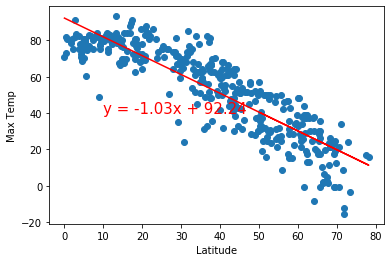

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, title=
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Max Temp', text_coordinates=(10,40))

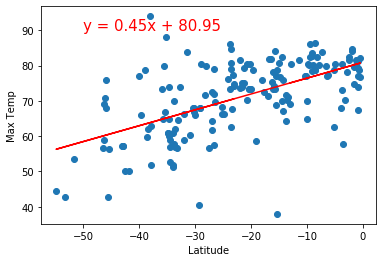

In [25]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

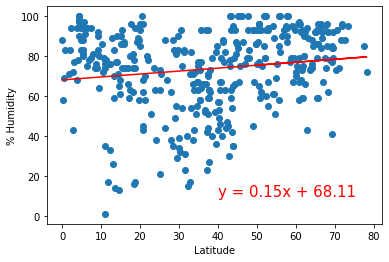

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

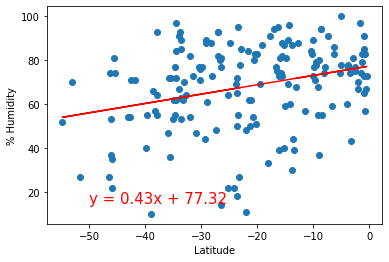

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

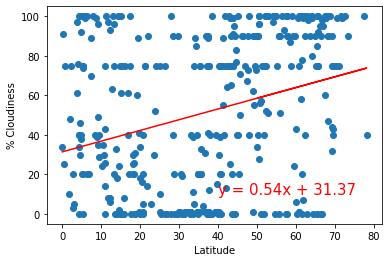

In [28]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

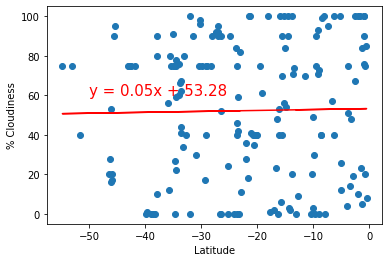

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

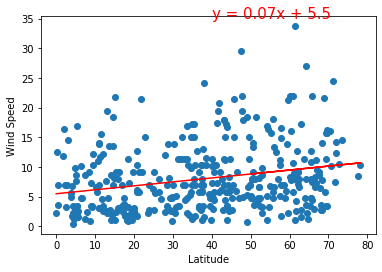

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

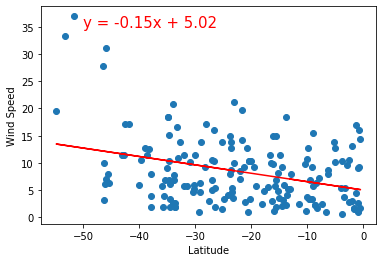

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))